# Imports

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Read files

In [44]:
trozoC = pd.read_csv("TrozoC.txt", names=["LP", "VD"], 
                     delimiter="\t", skiprows = range(3), 
                     index_col=False, decimal=",")

In [3]:
trozoG = pd.read_csv("TrozoG.txt", names=["LP", "VD", "Time"], 
                     delimiter="\t", skiprows = range(3), 
                     index_col=False, decimal=",")

In [4]:
trozoR = pd.read_csv("TrozoR.txt", names=["LP", "VD"], 
                     delimiter="\t", skiprows = range(3), 
                     index_col=False, decimal=",")

In [5]:
trozoC.head()

,LP,VD
0,0.004883,0.015259
1,0.001526,0.024109
2,-0.010681,0.031128
3,-0.022278,0.041809
4,-0.028076,0.045471


# Establecer umbral

In [45]:
umbral = (trozoC.quantile(0.75)-trozoC.quantile(0.25))*1.5
#umbral = trozoC[trozoC>=0].mean() + 2*trozoC[trozoC>=0].std()

In [50]:
def filter_with_threshold(df, threshold):
    return (df > threshold).astype(int)

In [51]:
trozoC = filter_with_threshold(trozoC, umbral)

El número de elementos que superan el umbral es:

In [53]:
trozoC.sum()

LP     1937513
VD    15451427
dtype: int64

# Agrupar picos

In [106]:
def get_spikes(df):
    """
    Busca los picos correspondientes a cada columna del dataframe utilizando find_peaks.
    """
    # Get number of columns
    cols = df.shape[1] if len(df.shape) > 1 else 1
    # Initialize peaks array
    peaks = [None]*cols
    # Loop over columns
    for index in range(cols):
        # Get peaks for each column
        peaks[index], _ = find_peaks(df.iloc[: , index])
        
    return peaks

El número total de picos encontrados es:

In [155]:
peaks = get_spikes(trozoC)
for i in peaks:
    print(len(i))

302460
956230


Ejemplo 

In [147]:
def plot_spikes(df, spikes):
    """
        Muestra los pucos junto con la serie
    """
    cols = df.shape[1] if len(df.shape) > 1 else 1
    fig, axs = plt.subplots(1, cols, figsize=(15,5))
    # Loop over columns
    for index in range(cols):
        # Get peaks for each column
        axs[index].plot(df.iloc[:, index])
        axs[index].plot(spikes[index], np.ones(len(spikes[index])), "x")

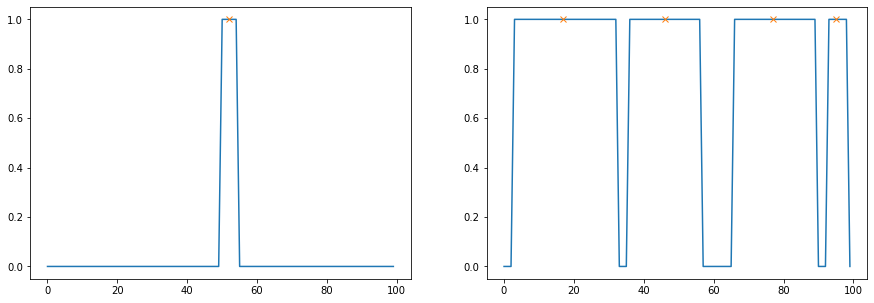

In [148]:
aux = trozoC[0:100]
spikes = get_spikes(aux)
plot_spikes(aux, spikes)